In [7]:

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,Normalizer
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from typing import Union
from sklearn.base import BaseEstimator
from typing import Any, List
import time
from sklearn.base import BaseEstimator
from typing import Any, List
import time
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import GroupKFold
from sklearn.model_selection._search import ParameterSampler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import pickle
import copy
from sklearn.base import clone
import matplotlib.pyplot as plt

In [8]:
from ml_pipeline.model import Model
from ml_pipeline.preprocessor import Preprocessor
from ml_pipeline.ml_preprocessor import MLPreprocessing
from ml_pipeline.evaluator import Evaluator
from ml_pipeline.loader import Loader
from ml_pipeline.orchestrator import Orchestrator
from ml_pipeline.trainer import Trainer
from ml_pipeline.model_tunning import ModelTunning
from ml_pipeline.selector import Selector

In [12]:
columns_map={"Maker":"fabricante"," Genmodel":"modelo_carro"," Genmodel_ID":"ano_modelo_carro",
            "Door_num":"portas","Seat_num":"lugares","repair_complexity":"nivel_conserto",
            "repair_cost":"custo_conserto","repair_date":"data_conserto","repair_hours":"tempo_conserto",
            "breakdown_date":"data_sinistro","Fuel_type":"combustível","Color":"cor","Adv_year":"ano_aviso",
            "Adv_month":"mes_aviso","Bodytype":"tipo_carro","issue":"tipo_falha","issue_id":"categoria_falha",
            "Reg_year":"ano_registro","Engin_size":"tamanho_motor","Gearbox":"tipo_cambio","Adv_day":"dia_aviso",
            "Runned_Miles":"milhas_carro","Price":"preço"}

cat_columns=["fabricante", 'modelo_carro', 'ano_modelo_carro', 'cor', 'tipo_carro' 
              ,'tipo_cambio', 'combustível', 'tipo_falha', 'categoria_falha','nivel_conserto']

disc_columns=["ano_registro","lugares","portas","dia_aviso",'tamanho_motor','mes_aviso','ano_aviso']
date_columns=["data_conserto","data_sinistro",]
cont_columns=['preço','tempo_conserto',"milhas_carro","custo_conserto"]
label_columns=["Label"]


loader=Loader('vehicle_claims_labeled.csv',cat_columns=cat_columns,date_columns=date_columns,cont_columns=cont_columns,disc_columns=disc_columns,label_columns=label_columns)
loader.rename_columns(columns_map)



KNN=Model(KNeighborsClassifier,params={},supervised=True,run_scaled=False)
KNN.grid_search_params(n_neighbors=range(3,25,2),weights=["uniform","distance"])
LR=Model(LogisticRegression,params={},supervised=True,run_scaled=False)
LR.random_grid_search_params(C=np.logspace(-4,4,20),penalty=["l1","l2"])
NB=Model(GaussianNB,params={},supervised=True,run_scaled=True,run_on_categorical=False)
NB.random_grid_search_params(var_smoothing=np.logspace(-9,-1,50))
NB.random_grid_search_params(var_smoothing=np.logspace(-9,-1,50))

models=[KNN,LR,NB]
ml_pipeline=Orchestrator(models,loader,Preprocessor,MLPreprocessing,Trainer,Evaluator,ModelTunning,Selector)
ml_pipeline.run_pipeline(cv=3,random_n_iter=3,grid_max_iter=3,decision_metric="precision")


/home/estevanmendes/Desktop/PUC_RIO/ml_pipeline/ml_pipeline/preprocessor.py:93: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  self.df[date_column] = pd.to_datetime(self.df[day_column].astype(float).astype(int).astype(str) \


['fabricante', 'modelo_carro', 'ano_modelo_carro', 'tipo_carro', 'combustível', 'tipo_falha', 'categoria_falha', 'nivel_conserto', 'cor_Silver', 'cor_Grey', 'cor_Blue', 'cor_Green', 'cor_Black', 'cor_Gelb', 'cor_White', 'cor_Red', 'cor_Brown', 'cor_Orange', 'cor_Maroon', 'cor_Purple', 'cor_Yellow', 'cor_Multicolour', 'cor_Gold', 'cor_Pink', 'cor_Bronze', 'cor_Beige', 'cor_Burgundy', 'cor_Magenta', 'cor_Turquoise', 'cor_Indigo', 'cor_Navy', 'tipo_cambio_Automatic', 'tipo_cambio_Semi-Automatic', 'tipo_cambio_Manual', 'tipo_cambio_Hybrid']
56748


/home/estevanmendes/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/estevanmendes/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/estevanmendes/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

--------------------Grid Search Parameters--------------------
{'var_smoothing': array([6.62855683e-08])}
--------------------------------------------------


/home/estevanmendes/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/estevanmendes/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/estevanmendes/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/estevanmendes/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expec

56748


/home/estevanmendes/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(var_smoothing=1.3257113655901082e-07)

In [13]:
ml_pipeline.get_metrics()

{'accuracy': 0.6964807169469338,
 'precision': 0.9638989169675091,
 'recall': 0.40522082258309305,
 'f1': 0.5705737792499199,
 'roc_auc': 0.6950942515480981}

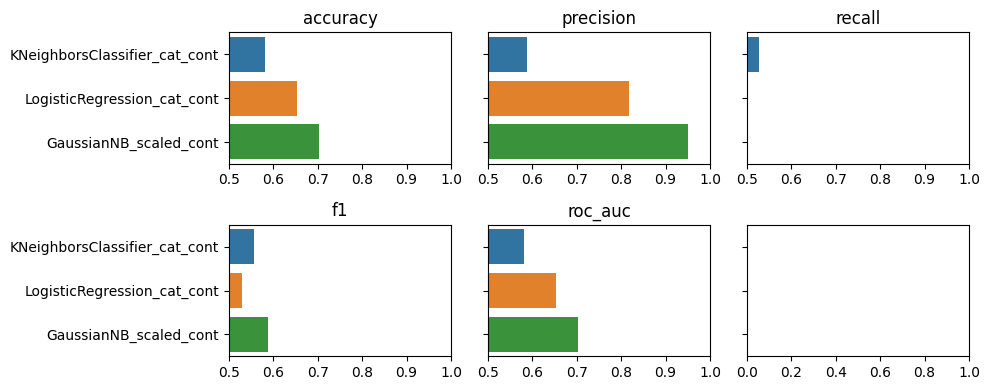

In [14]:
a=ml_pipeline.plot_metrics()